# Project Description
In this notebook I will go over some of the basics of a fully connect feed forward neural network. I will mainly focus on their applications, how neural networks are formed, trained, and the math. To demonstrate this I will create my own neural network from scratch using `numpy` (a python library). 

First lets go over what data we are going to be using and what exactly we are trying to do. In this notebook I will use the use the mnist dataset (import from tensorflow) as an example. In this dataset we are given ,. [iris dataset](https://archive.ics.uci.edu/ml/datasets/iris) as an example. In this dataset we are given five columns `sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)` and `class`. The first four are all size measurements of a flowers sepal and petal. The `class` (label) column is used to represent if a flower is one of these three flowers `Iris-versicolor, Iris-setosa, Iris-virginica`. So now what we will attempt to do is classify each of these flowers given these measurements.

Now that we know what this notebook is going go over I have to mention some things that will be helpful to know before reading. This notebook goes into the math of neural networks. Some math knowledge of matrix multiplication and multivariable calculus will be useful. We will be doing all the math with numpy so python is important as well. 

In [1]:
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import scipy

# The Data

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

Taking a look at our data we can see that there are multiple variables. As I mentioned these variables are all size measurements of a flowers sepal and petal in cm.

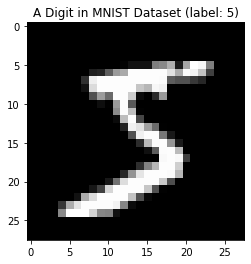

In [3]:
plt.gray()
plt.title('A Digit in MNIST Dataset (label: 5)')
plt.imshow(X_train[0]) 
plt.show()

In [4]:
y_train[0]

5

<!-- Neural networks are very powerful tools that can help us solve problems with data that is non linear. For example if we have some data that is linear seperable we can easily draw a line to seperate and classify whatever it is we are trying to classify. But if we have some non linear data we can't do that. This is where neural networks come in. 
To further drive the point that simple logistic regression will not work we will graph the data to see what it looks like.  -->

In [5]:
class NeuralNetwork:
    def __init__(self, input_shape, h1_shape, h2_shape, output_shape):
        # layers/activations
      
        self.input = np.random.rand(input_shape, 1)- 0.5
        self.h1 = np.random.rand(h1_shape, 1)- 0.5
        self.h2 = np.random.rand(h2_shape, 1)- 0.5
        self.h3 = np.random.rand(output_shape, 1)- 0.5
        # weights 
        self.w_1 = np.random.rand(h1_shape, input_shape)- 0.5
        self.w_2 = np.random.rand(h2_shape, h1_shape)-0.5
        self.w_3 = np.random.rand(output_shape, h2_shape)- 0.5
        
        # biases 
        self.b_1 = np.random.rand(h1_shape, 1) - 0.5
        self.b_2 = np.random.rand(h2_shape, 1) - 0.5
        self.b_3 = np.random.rand(output_shape, 1) - 0.5 
        
    def relu(self,activations):
        return np.maximum(0, activations)

    def relu_deriv(self, activations):
        return activations > 0

    def softmax(self, activations):
        return np.exp(activations) / np.sum(np.exp(activations))
    
    def feed_forward(self, X):
        # input
        # reshapre the input into vector form.
        # Example [1, 0, 0] -> [[1], [1], [1]]
        self.input = np.reshape(X, (-1,1))
        
        # input -> h1
        # the activations in the first hidden layer are given by the dot product 
        # of the weights by the input plus some biass its all then passed into
        # our activation function. relu(W_1*x+b_1)
        # TODO : fix feed forward (breaks at this line below)
        h1_activations = self.relu(np.dot(self.w_1, self.input) + self.b_1)
        self.h1 = h1_activations

        # h1 -> h2
        # the activations in the seocnd hidden layer (h_2) are given by the dot product 
        # of the second weights (w_2) by the previous activations (h1) plus the bias(b_2).
        # W_2*h1+b_2
        h2_activations = self.relu(np.dot(self.w_2, h1_activations) + self.b_2)
        self.h2 = h2_activations 
        
        h3_activations = np.dot(self.w_3, h2_activations) + self.b_3
        self.h3 = h3_activations
        # h2 -> output 
        # our output activtions/predictions are given by the second layer activations (h_2)
        # put into the softmax function. 
        output = self.softmax(self.h3)
        
        return output
    
    def back_prop(self, output, y, learning_rate=0.01):
        # print(output)
        # print(y)
        # y = np.reshape(y, (-1,1))
        # error produced by the output
        output_error = (2 * (output - y))
        # print(output_error)

        # derivative of cosf function with respect to third weights
        dw_3 = -learning_rate * output_error.dot(self.h2.T)
        # derivative of cost function with respect to the third biases
        db_3 = -learning_rate * output_error
        
        # error produced by the second hidden layer activations
        h2_error = self.w_3.T.dot(output_error) * self.relu_deriv(self.h2)
        # derivative of cost function with respect to second weights
        dw_2 = -learning_rate * h2_error.dot(self.h1.T)
        # derivative of the cost function with respect to second biases
        db_2 = -learning_rate * h2_error

        # error produced by the first hidden layer activations
        h1_error = self.w_2.T.dot(h2_error) * self.relu_deriv(self.h1)
        dw_1 = -learning_rate * h1_error.dot(self.input.T)
        db_1 = -learning_rate * h1_error
        
        # update all the weights
        self.w_1 += dw_1
        self.w_2 += dw_2
        self.w_3 += dw_3
        
        # update all the biases
        self.b_1 += db_1
        self.b_2 += db_2
        self.b_3 += db_3
        return 0

    def get_y_vector(self, y):
        vector = [1 if i == y else 0 for i in range(len(self.h2))]
        vector = np.reshape(vector, (-1, 1))
        return vector
       
    def accuracy(self, X_data, y_data):
        # TODO : X_data and y_data were previously wrong
        total_correct = 0
        for i in range(len(X_data)):
            X = np.array(X_data[i].flatten())
            y = self.get_y_vector(y_data[i])
            # print(y)
            output = self.feed_forward(X)
            index_predicted = int(list(output).index(max(list(output))))
            if list(y).index(max(y)) == index_predicted:
                total_correct += 1
        print(total_correct)
        
        return total_correct/len(X_data)
    
    def train(self, X_train, y_train, iterations):
        for i in range(iterations):
            for i in range(len(X_train)):
                # X = X_train[i]/225
                X = np.array(X_train[i].flatten())
                # print(type(X))
                y = self.get_y_vector(y_train[i])
                output = self.feed_forward(X)
                # print(y.shape)
                # print(output.shape)
                self.back_prop(output, y)
        training_accuracy = self.accuracy(X_train, y_train)
        return training_accuracy

In [6]:
input_shape = X_train[0].flatten().shape[0]
input_shape

784

In [7]:
output_shape = len(list(set(y_train)))
output_shape

10

In [8]:
neural_network = NeuralNetwork(input_shape=input_shape, h1_shape=10, h2_shape=10, output_shape=output_shape)

In [10]:
X_train = X_train/255

In [11]:
training_accuracy = neural_network.train(X_train, y_train, 1)

52359


In [12]:
training_accuracy

0.87265

In [13]:
test_accuracy = neural_network.accuracy(X_test/255, y_test)

52359


In [15]:
test_accuracy

5.2359

In [20]:
X_test.shape[0]

10000

# TODO: finish explaining the grpah
Below is a scatter plot graph of what our data looks like. We have three different colors for representing each class. As we can see the data is not linearly seperable. We have three classes and they overlap. A model like linear regression will not be useful in helping us with classifying this. Also as we saw above our data is not two dimensional it is four dimensional.

In [ ]:
plt.scatter(setosa['sepal length (cm)'], setosa['sepal width (cm)'], color='b', label='setosa')
plt.scatter(versicolor['sepal length (cm)'], versicolor['sepal width (cm)'], color='r', label='versicolor')
plt.scatter(virginica['sepal length (cm)'], virginica['sepal width (cm)'], color='g', label='virginica')
plt.legend(loc ='lower right')
plt.xlabel('sepal length cm')
plt.ylabel('sepal width cm')
plt.legend(loc="lower right")
plt.show()

Now that we have taken a look at our data we can get into creating a neural network.

# Neural Network Anatomy
A neural network is formed by an input layer, some number of hidden layers, and an ouput layer. All of these layers contain some number of neurons. The input layer has as many neurons as it does inputs. For example in our network our input layer will have four neurons for `sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)`. Simiarly our output layer has as many neurons as it does classes. For example we have the three classes `Iris-versicolor, Iris-setosa, Iris-virginica` so we will have three output neurons. As I mentioned we can have as many hidden layers as we want. Within the hidden layers we can have as many neurons as we choose as well. To demonstrate what a nerual network looks like below is an image of the neural network that is made later in this notebook.
# TODO add image of the neural network we are building

The lines connecting the input layer to the first hidden layers are called weights same for the first hidden layer to the second hidden layers. These weights are what we will later be adjusting using back propogation.

The idea of the nueral network is that we have some inputs and we want to pass them forward to through the network (from the input to hidden layers and to the output). The

# The Math (Feeding Forward)
To feed forward an input from the input layer to the first hidden layer we will multiply all inputs $\vec{x}$ by all the weights connecting the input layer to h1 $W_1$ and add some bias $b_1$. Doing all that will give us $h_1$. We then apply some non linearity function to that and that will be our activations. In this case we are using relu. This looks like this: 
$$ \vec{z_1} = relu(\vec{h_1})$$
$$ \vec{h_1} = W_1 * \vec{x} + \vec{b_1} $$
$$ \vec{z_1} = relu(W_1 * \vec{x} + \vec{b_1})$$

Now we just continue this unitl we get to the output layer. So to keep forwarding this input we would now do this: 

$$ \vec{z_2} = \vec{h_2}$$
$$ \vec{h_2} = W_2 * \vec{z_1} + \vec{b_2} $$
$$ \vec{z_2} = W_2 * \vec{z_1} + \vec{b_2}$$

And lastly our ouput will simply just be:
$$ \hat{y} = softmax(\vec{z_2}) $$ 
Now that we know how to feed forward an input in a neural network we can go over how to train them. In the section below I will explain the back propagation. Back propagation is the algorithm that allows us to train our neural network so we can learn the correct value for our many parameters (weights, biases)

# Back Propogation
As I mentioned neural networks contain weights and biases. We can manually adjust them or set them to random variables to see which values give us the best result. This of course is not a good proccess seeing how our network has so many weights and biases. What we want to do instead is learn the values to our weights and biases that will minimise our loss. We can do this with calculus. We can do this by taking the negative gradient of our cost function ($ C = (\hat{y}-y)^2$). The gradient gives the direction of fastest assent. So if we take the negative gradient we will approach a place in which our loss is as close to 0 as possible.  Below I will explain the math that allows us to learn the values for our weights and biases. This will involved mutlivariable calculus.

This is a basic example of what our network looks like. We have an input($X$), two hidden layers ($h_1,h_2$) and two weights ($W_1,W_2$). 
$$ X ---W_1---> h_1 ---W_2---> h_2$$

To calculate the error that our network produces we use the cost function $ C = (\hat{y} - y)^2 $
where $ \hat{y} $ is the output vector/activations and $ y $ is the label as a vector. An example of what these look like is $ \hat{y} = \begin{bmatrix}
0.8 \\
0.1 \\
0.1 
\end{bmatrix} $ and $ \hat{y} = \begin{bmatrix}
1 \\
0 \\
0
\end{bmatrix} $

As I mentioned our output is $\hat{y}$ which is given by the follwing function $\hat{y} = softmax(h_2)$. The activations $h_2$ are passed trough the softmax function. 

$$ \hat{y} = softmax( W_2 * \vec{h_1} + \vec{b_2} ) $$

As we saw above to feed forward and input we use a series of functions. For example to get the first hidden layers activations we do this $ \vec{z_1} = relu(W_1 * \vec{x} + \vec{b_1})$. What we want to do now is see how much each weight and bias is affecting our cost. In other words whats the derivative of the cost function $C$ with respect to $W_1$. 

In the example below we will take the derivative of our cost function with respect to the second weights ($W_2$).
$$ C = (\hat{y}-y)^2  \hspace{10mm} \frac{\partial C}  {\partial \hat{y}} = 2(\hat{y} - y)$$

$$ z^\hat{y} = W_2 * \vec{z_1} + \vec{b_2}  \hspace{10mm}  \frac{\partial z^\hat{y}}{\partial W_2} = \vec{z_1}$$

$$ \frac{\partial C}{\partial W_2} = \frac{\partial C}{\partial \hat{y}} \frac{\partial z^\hat{y}}{\partial W_2} = 2(\hat{y} - y) * \vec{h_1} $$

This will tell us by how much we should change the weights in $W_2$ Now we just continue this proccess until we reach the input layer. But first we need to calculate the error produced by the activations in the first hidden layer $\frac{\partial C}{\partial h_1}$.

$$ C = (\hat{y}-y)^2  \hspace{10mm} \frac{\partial C}  {\partial \hat{y}} = 2(\hat{y} - y)$$
$$ \hat{y} = h_2  \hspace{10mm} \frac{\partial \hat{y}}  {\partial h_2}$$
$$ h_2 = W_2 *z_1 + b_1 \hspace{10mm} \frac{\partial h_2}  {\partial z_1} = W_2$$
$$ z_1 = relu(h_1) \hspace{10mm} \frac{\partial z_1}  {\partial h_1} = relu`(h_1)$$



$$ \frac{\partial C}{\partial h_1} = \frac{\partial C}  {\partial \hat{y}} \frac{\partial \hat{y}}  {\partial h_2} \frac{\partial h_2}  {\partial z_1} \frac{\partial z_1}  {\partial h_1} = 2(\hat{y} - y) *  W_2 * relu`(h_1)$$

$$ 2(\hat{y} - y) *  W_2 * relu`(h_1) $$ This will tell us the error in the first hidden layer. Now we can continue our back propogation. Our next derivative to get is going to be $\frac{\partial h_1}{\partial W_1}$. This will tell use how to change the weights in $W_1$. Because we have calculated all of our chain rule deriatives all that is left is just now.

$$ h_1 = \vec{x}*W_1+b_1 \hspace{10mm} \frac{\partial h_1}  {\partial W_1} = \vec{x}$$

$$ \frac{\partial C}  {\partial h_1} \frac{\partial h_1}  {\partial W_1}  = \vec{x}\frac{\partial C}  {\partial h_1} $$



Now that we have talked about how a neural network feeds forward an input to get and output. And that we have went over how we can learn the values of the weights and biases of our neural network, it is time to build one. Below is the code to a neural network class which we will train to classify dataset. The network below has an input layer of four nerons for our for inputs, 2 hidden layers one of two neurons and one of 3 output neurons. I will go over how a neural network is trained below as well but as mentioned it involves the calculus that is explained above.

# Creating the Network
Below is the code for a neural network. As explained earlier our network will have a input layer, two hidden layers, and two weights. It has a function to feed forward an input and also to perform back propagation. Lastly it also has a function to train. 

In [ ]:
class NeuralNetwork:
    def __init__(self):
        # layers/activations
        self.input = np.random.rand(4, 1)
        self.h1 = np.random.rand(2, 1)
        self.h2 = np.random.rand(3, 1)
        
        # weights 
        self.w_1 = np.random.rand(2, 4)
        self.w_2 = np.random.rand(3, 2)
        
        # biases 
        self.b_1 = np.random.rand(2, 1)
        self.b_2 = np.random.rand(3, 1)

    def relu(self,activations):
        return np.maximum(0, activations)

    def relu_deriv(self, activations):
        return activations > 0

    def softmax(self, activations):
        return np.exp(activations) / np.sum(np.exp(activations))
    
    def feed_forward(self, X):
        # input
        # reshapre the input into vector form.
        # Example [1, 0, 0] -> [[1], [1], [1]]
        self.input = np.reshape(X, (-1,1))
        
        # input -> h1
        # the activations in the first hidden layer are given by the dot product 
        # of the weights by the input plus some biass its all then passed into
        # our activation function. relu(W_1*x+b_1)
        h1_activations = self.relu(np.dot(self.w_1, self.input) + self.b_1)
        self.h1 = h1_activations

        # h1 -> h2
        # the activations in the seocnd hidden layer (h_2) are given by the dot product 
        # of the second weights (w_2) by the previous activations (h1) plus the bias(b_2).
        # W_2*h1+b_2
        h2_activations = (np.dot(self.w_2, h1_activations) + self.b_2)
        self.h2 = h2_activations 

        # h2 -> output 
        # our output activtions/predictions are given by the second layer activations (h_2)
        # put into the softmax function. 
        output = self.softmax(self.h2)
        
        return (output, max(output))
    
    def back_prop(self, output, y, learning_rate=0.01):
        y = np.reshape(y, (-1,1))
        
        output_error = (2 * (output - y))
        
        dw_2 = -learning_rate * output_error.dot(self.h1.T)
        b_2 = -learning_rate * output_error

        h1_error = self.w_2.T.dot(output_error) * self.relu_deriv(self.h1)
        dw_1 = -learning_rate * h1_error.dot(self.input.T)
        b_1 = -learning_rate * h1_error
        
        # update all the weights
        self.w_1 +=  dw_1
        self.w_2 +=  dw_2
        
        # update all the biases
        self.b_1 += b_1
        self.b_2 += b_2
        return 0
       
    def accuracy(self, data):
        total_correct = 0
        for index, row in data.iterrows():
            # Our input value is the first four colmuns in our dataset.
            # Since each row is turned into a list here we select the
            # first four elements in the list whihch will be our intput.
            X = row.tolist()[:4] 
            # Our output value is the last three colmuns in our dataset.
            # To select it we select the last three elemets in the list
            # that will be our output.
            y = row.tolist()[4:]
            output, predicted = self.feed_forward(X)
            # get the index of the label (ie index = 2 [0, 0, 1])
            label_index = y.index(max(y))
            # check if the index of the label is the same as our
            # index as the max value in our output vector
            predicted_index = np.where(output==predicted)[0][0]
            # if they are the same index increase the correct counter
            if label_index == predicted_index:
                total_correct += 1
        return total_correct/data.shape[0]
    
    def train(self, data, iterations):
        for i in range(iterations):
            for index, row in data.iterrows():
                # Our input value is the first four colmuns in our dataset.
                # Since each row is turned into a list here we select the
                # first four elements in the list whihch will be our intput.
                X = row.tolist()[:4] 
                # Our output value is the last three colmuns in our dataset.
                # To select it we select the last three elemets in the list
                # that will be our output.
                y = row.tolist()[4:]
                output, predicted = self.feed_forward(X)
                self.back_prop(output, y)
        training_accuracy = self.accuracy(data)
        return training_accuracy

# Using the Network
Now that we have gone over the basics of neural networks we still have to do one more step. We want to find out how many iterations should we train our model for. For example should we train for `1` or `100`. We can do this by trying many iterations and seeing where the test loss decreases as our train loss increases. This will mean we are overfitting. Overfitting is when are just memorizing our data and not actually learning so our model only performs well on our training data but not test set. Lastly the loss is the error produced by the model for one example. Below I have a function to get the loss produced by each iteration so we can graph this out as well. 

In [ ]:
iterations = [i for i in range(1, 1000, 100)]

In [ ]:
def get_info(iterations, train_data, test_data):
    """
    function to get info on training data ie. loss and iterations
    """
    training_info = {'iteration': [], 'training': [], 'test': []}
    for i in range(len(iterations)):
        nn = NeuralNetwork()
        nn.train(train_data, iterations[i])
        train_example = train_data.loc[np.random.choice(train_data.index, size=1)]
        test_example = test_data.loc[np.random.choice(test_data.index, size=1)]
        X_train = train_example.iloc[0].tolist()[:4] 
        y_train = train_example.iloc[0].tolist()[4:]
        X_test = test_example.iloc[0].tolist()[:4]
        y_test = test_example.iloc[0].tolist()[4:]
        train_output, train_predicted = nn.feed_forward(X_train)
        test_output, test_predicted = nn.feed_forward(X_test)
        
        train_loss = (1-train_predicted)
        test_loss = (1-test_predicted)
        
        training_info['iteration'].append(iterations[i])
        training_info['training'].append(train_loss)
        training_info['test'].append(test_loss)
    training_info = pd.DataFrame(data=training_info)
    return training_info

In [ ]:
df = get_info(iterations, train_data, test_data)

In [ ]:
df.head()

Here is our graph. #TODO : finish explaning this graph. 

In [ ]:
plt.plot(df['iteration'], df['training'], color='b', label='training loss')
plt.plot(df['iteration'], df['test'], color='r', label='test loss')
plt.scatter(df['iteration'], df['training'], color='b')
plt.scatter(df['iteration'], df['test'], color='r')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.legend(loc="upper right")
plt.title("Loss by Iteration")
plt.show()

In [ ]:
neural_network = NeuralNetwork()

In [ ]:
training_accuracy = neural_network.train(train_data, 400)

In [ ]:
print(f'Training Accuracy: {training_accuracy}')

In [ ]:
print(f'Test Accuracy: {neural_network.accuracy(test_data)}')

# Further Topics of Neural Networks
In this notebook I went over some basics of neural networks but there are somethings I wanted to mention as well. One of the things that we can implement in our neural network to give us better peformance is introduce a dropout layer. What a dropout layer is is a layer in which some number of neurons will turn to 0 no matter what. For example as we train our network and we are feeding forward an example we can choose to set 1 neuron in our layer to equal 0. This will make sure that the neural network doesn't just memorize the data and overfit. It will make sure that it's actually learning the data and its important relationships. 

Another thing I wanted to go over was a different training method from the one used in this notebook. In this notebook we took the gradient of our cost function using our whole data. What we could do instead is do stocastic gradient descent which means instead of taking the gradient of our cost function for our whole data we take the gradient of our cost function using some mini batches. A mini batch is just our sbuset our data. So instead of feeding all of our data for every iteration and performing back propagation we instead feed a mini batch of our data and calculate the gradient for that. Doing this will allow for faster training since we only have to take a smaller gradient for each mini batch.

# Conclusion